In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
# import scvi
import anndata


In [2]:
sc.set_figure_params(frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

In [3]:
adata = sc.read('lung_heoa_3khvg.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 225487 × 3000
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes', 'sample_id', 'level_1', 'level_2', 'level_3', 'sort_batch', 'Cell_type', 'n_counts', 'batch', 'publication', 'sample_name', 'tissue', 'derive', 'detail_tissue', 'time', 'time2', 'main_cells', 'protocol', 'tech', 'tech_detail', 'molecular', 'gel', 'conditions_combined'
    obsm: 'X_umap'

In [5]:
adata.obsm['X_scpoli'] = adata.obsm['X_umap']

In [6]:
col_map = pd.read_table('gut_scpoli_color.txt', header=None, index_col=0)
col_map = dict(zip(col_map.index, col_map[1]))

adata.uns['level_1_colors'] = adata.obs.level_1.cat.categories.map(col_map).tolist()
adata.uns['level_2_colors'] = adata.obs.level_2.cat.categories.map(col_map).tolist()
adata.uns['level_3_colors'] = adata.obs.level_3.cat.categories.map(col_map).tolist()
adata.uns['tissue_colors'] = adata.obs.tissue.cat.categories.map(col_map).tolist()
adata.uns['derive_colors'] = adata.obs.derive.cat.categories.map(col_map).tolist()

In [7]:
import umap
model = umap.UMAP(n_neighbors=5, random_state=42, min_dist=0.5).fit(adata.obsm['X_umap'])
adata.obsm['X_umap'] = model.transform(adata.obsm['X_umap'])

In [133]:
import pickle
f_name = 'lung_epithelial_umap_model.sav'
pickle.dump(model, open(f_name, 'wb'))

/home/theislab/l_zadeh/.conda/envs/r4-base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/theislab/l_zadeh/.conda/envs/r4-base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


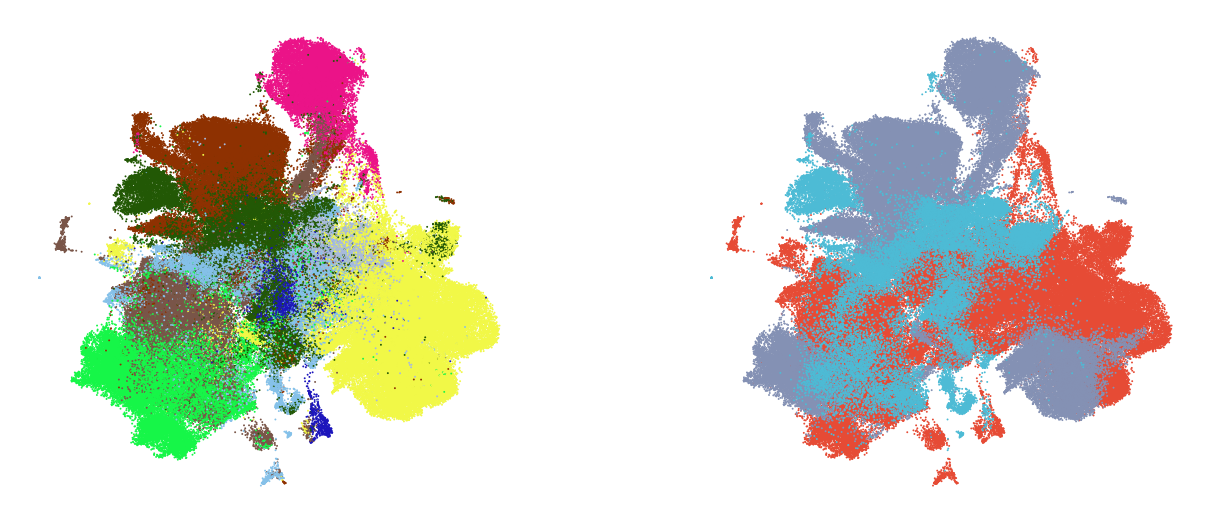

In [21]:
sc.pl.umap(adata, color=[ "level_2", "derive"], 
           size = 3, legend_loc=None,
           title = ['',''],
#                             wspace = 0.001, 
           ncols=2, frameon=False, show=True, 
          save = 'integrated_lung_epithelial_ann_level2_derive_200723.png'
          )

/home/theislab/l_zadeh/.conda/envs/r4-base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/home/theislab/l_zadeh/.conda/envs/r4-base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


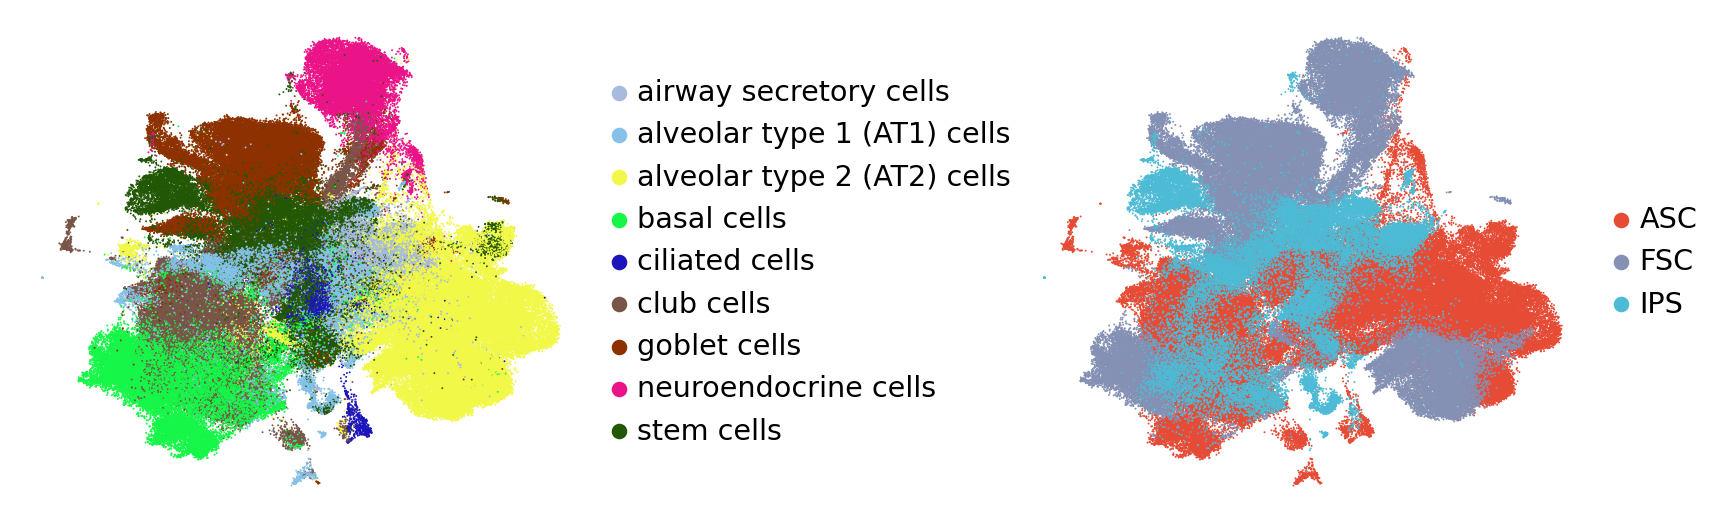

In [18]:
sc.pl.umap(adata, color=[ "level_2", "derive"], 
           size = 3, #legend_loc=None,
           title = ['',''],
                            wspace = 0.6, 
           ncols=2, frameon=False, show=True, 
          save = 'integrated_lung_epithelial_ann_level2_derive_wLegend_200723.png'
          )

In [25]:
embd_ref = sc.AnnData(adata.obsm['X_scpoli'])

embd_ref.obs_names = adata.obs_names
embd_ref.obs = adata.obs.copy()
embd_ref.obsm['X_umap'] = adata.obsm['X_umap']

In [26]:
markers = ['EPCAM',#'PLCG2',
           'LGR5','OLFM4','ASCL2','TP63','KRT8','KRT14',
          'FOXJ1','MUC5AC',#'MUC5B',
           'SCGB1A1','CC10','SFTPC','SFTPB',
          'PDPN','HOPX','CHGA','ASCL1','SCGB3A2']


markers = [x for x in markers if x in adata.var_names]



In [27]:
adata_markers = adata[:, adata.var_names.isin(markers) ].copy()
sc.pp.normalize_total(adata_markers, target_sum=1e6)
sc.pp.log1p(adata_markers)
adata_markers = adata_markers.to_df()
embd_ref.obs = pd.concat((adata.obs, adata_markers), axis = 1)

/home/theislab/l_zadeh/.conda/envs/r4-base/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


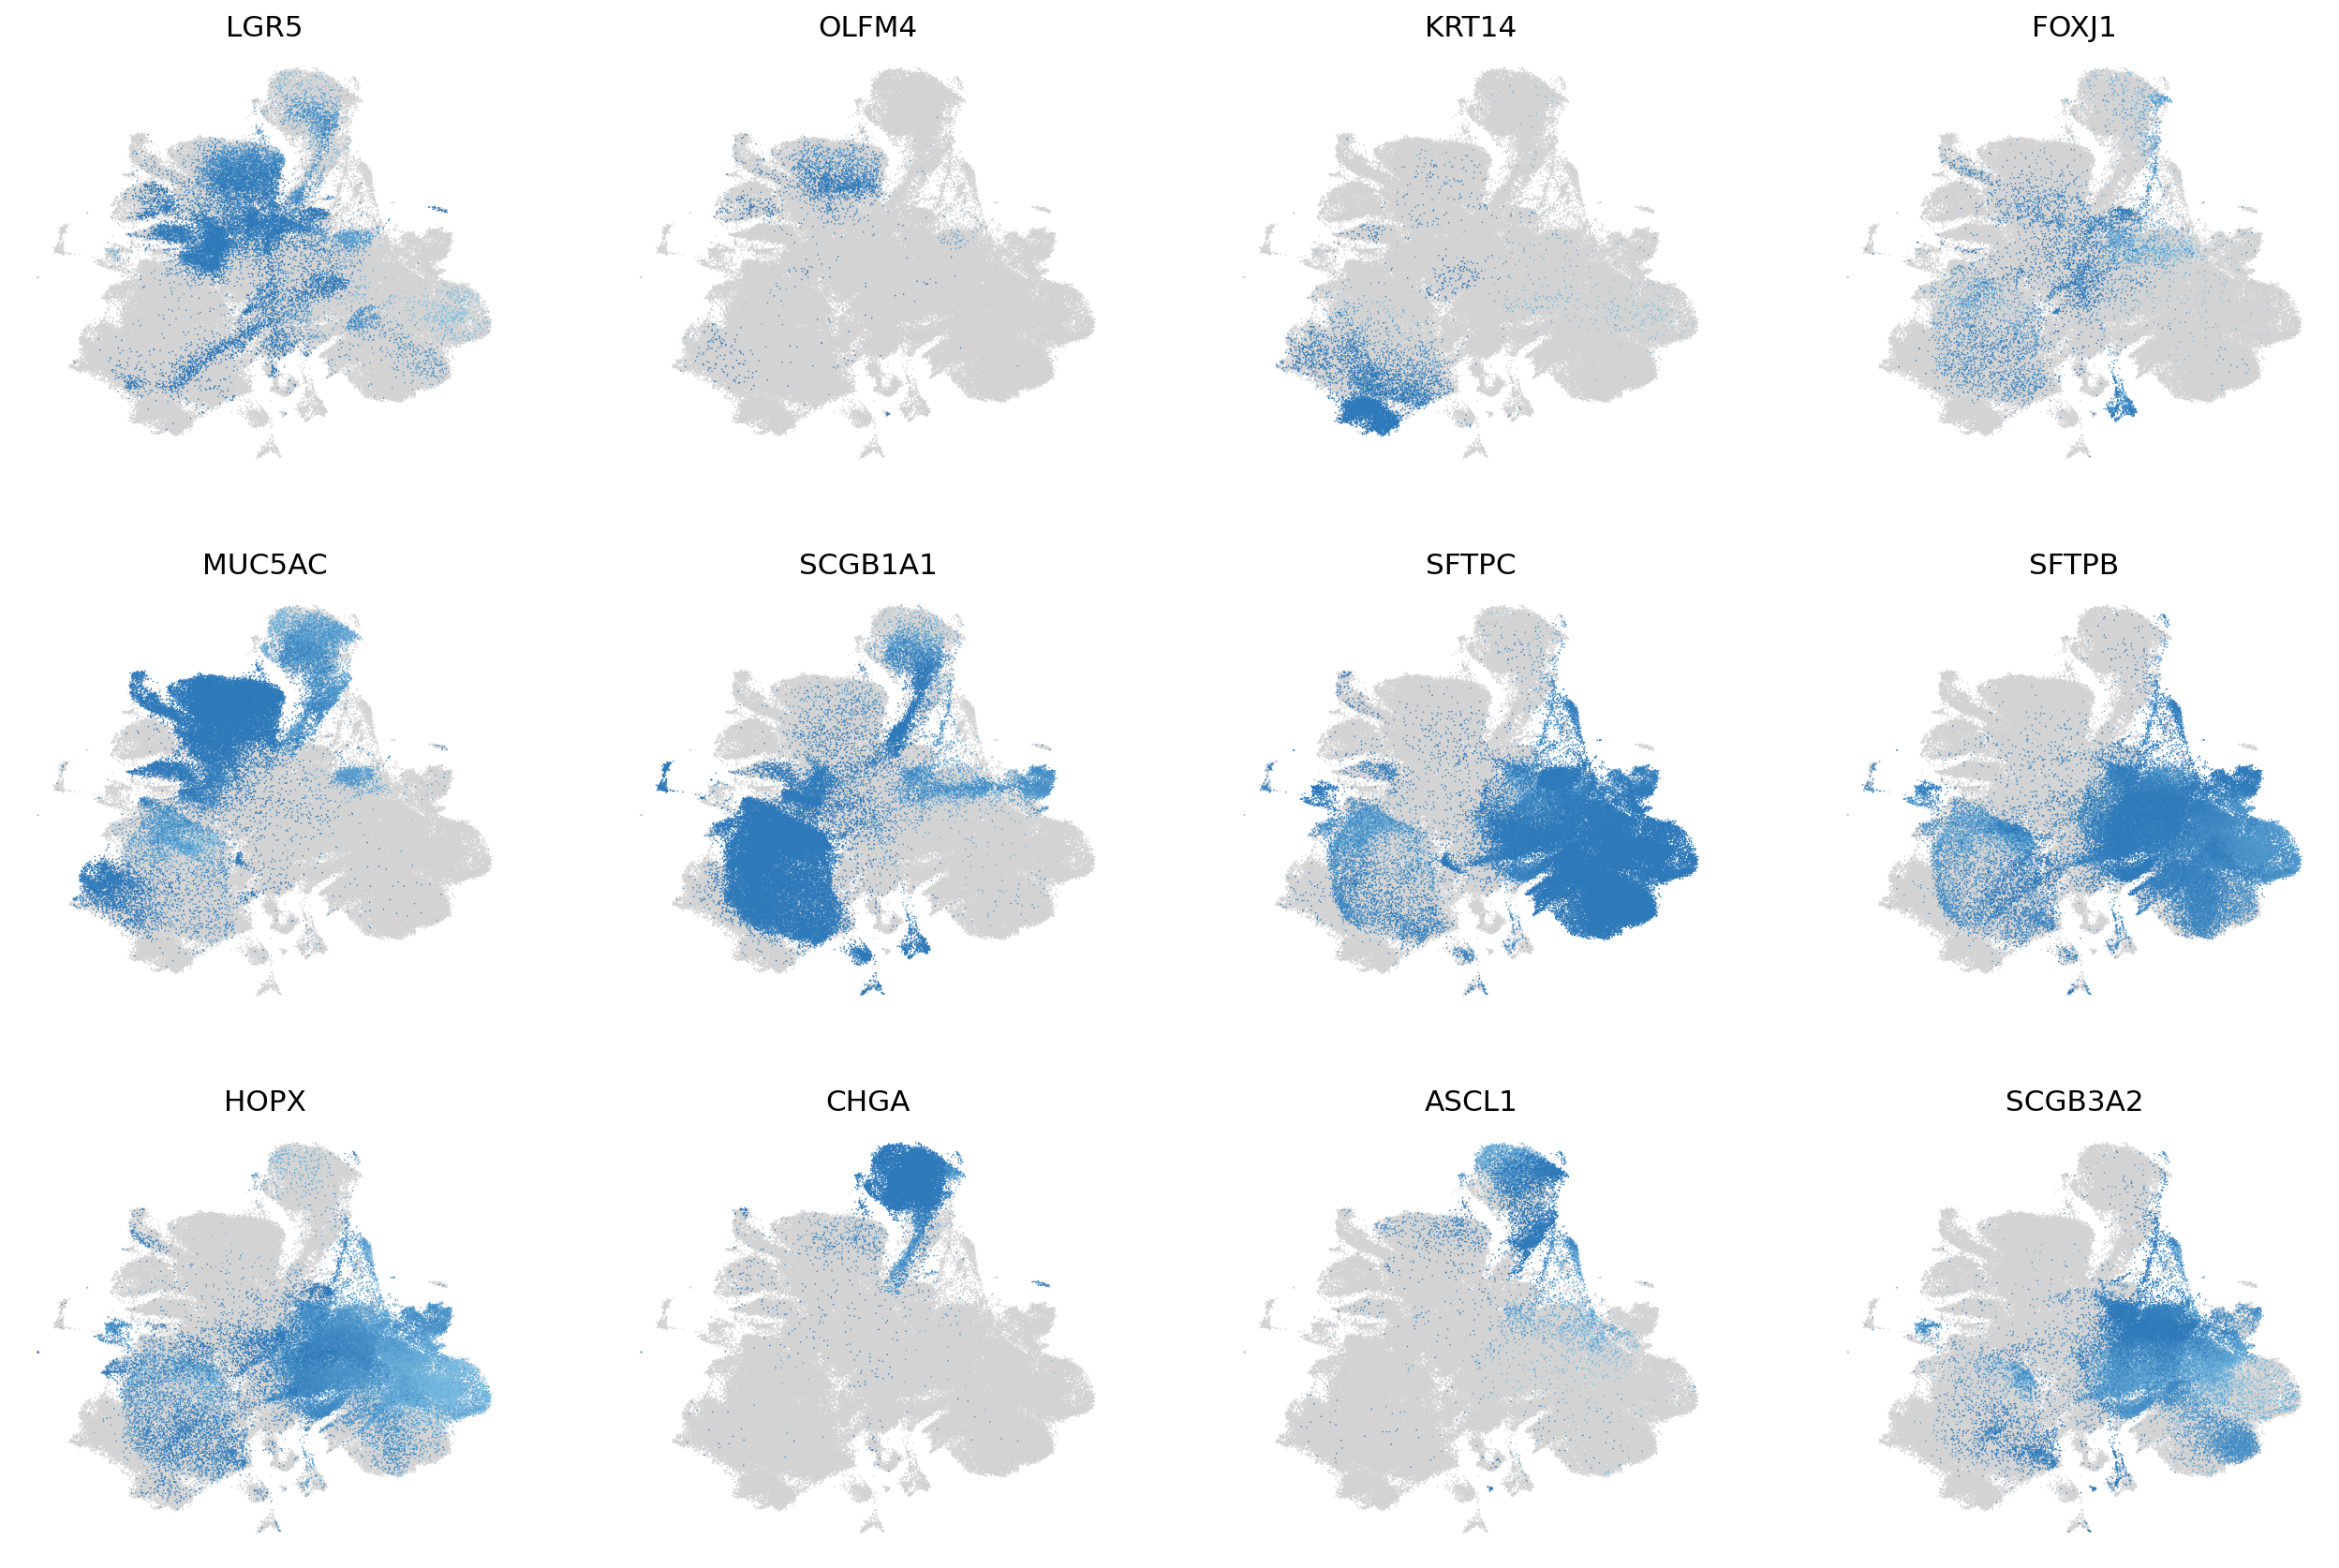

In [29]:
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["lightgray",'#7ec0e4','#2e79ba'])


gns = mpl.cm.Blues
gns.set_bad('lightgray')
gns.set_under('lightgray')

sc.pl.umap(embd_ref, color=markers, size =2, colorbar_loc=None,
           color_map=cmap, #gns, #cmap, #my_cmap2, #mpl.colormaps['Blues'],
                            ncols=4, frameon=False, show=True,
          save = 'integrated_lung_epithelial_ann_markers_200723.png'
          )

In [31]:
# cell type composition per sample by derive
pd.set_option("display.max_columns", None)

adata.obs

initial_size_spliced  initial_size_unspliced  \
cells                                                                
AAACCCACAAAGCTAA-132               31397.0                 14368.0   
AAACCCACACTGTGTA-132               24573.0                  8025.0   
AAACCCATCCGCAGTG-132               21147.0                  6246.0   
AAACCCATCTAGTGTG-132                8687.0                  3785.0   
AAACGAACAACTCCCT-132               11375.0                  5798.0   
...                                    ...                     ...   
TTTGATCAGTCTAGCT-183                9504.0                 21130.0   
TTTGATCCAACATACC-183               50587.0                 52023.0   
TTTGGAGAGGAGAGGC-183                9358.0                  9525.0   
TTTGGTTAGTGCAGCA-183               11309.0                 14530.0   
TTTGTTGCACATGAAA-183               15775.0                 29314.0   

                      initial_size  n_genes_by_counts  total_counts  \
cells                                                                 
AAACCCACAAAGCTAA-132       31397.0               6808       39508.0   
AAACCCACACTGTGTA-132       24573.0               4675       31483.0   
AAACCCATCCGCAGTG-132       21147.0               4822       26328.0   
AAACCCATCTAGTGTG-132        8687.0               2726       11182.0   
AAACGAACAACTCCCT-132       11375.0               3956       14544.0   
...                            ...                ...           ...   
TTTGATCAGTCTAGCT-183        9504.0               4459       11821.0   
TTTGATCCAACATACC-183       50587.0               8910       61103.0   
TTTGGAGAGGAGAGGC-183        9358.0               3935       10915.0   
TTTGGTTAGTGCAGCA-183       11309.0               4664       13709.0   
TTTGTTGCACATGAAA-183       15775.0               6077       19719.0   

                      total_counts_mt  pct_counts_mt  total_counts_ribo  \
cells                                                                     
AAACCCACAAAGCTAA-132           4868.0      12.321555             7983.0   
AAACCCACACTGTGTA-132           3729.0      11.844487             7484.0   
AAACCCATCCGCAGTG-132           2810.0      10.673048             5713.0   
AAACCCATCTAGTGTG-132            632.0       5.651941             3580.0   
AAACGAACAACTCCCT-132           1113.0       7.652640             4326.0   
...                               ...            ...                ...   
TTTGATCAGTCTAGCT-183           2224.0      18.813974              739.0   
TTTGATCCAACATACC-183           1360.0       2.225750            11083.0   
TTTGGAGAGGAGAGGC-183           2025.0      18.552450             1227.0   
TTTGGTTAGTGCAGCA-183           1197.0       8.731490             2147.0   
TTTGTTGCACATGAAA-183           1220.0       6.186926             1840.0   

                      pct_counts_ribo  total_counts_hb  pct_counts_hb  \
cells                                                                   
AAACCCACAAAGCTAA-132        20.206034              1.0       0.002531   
AAACCCACACTGTGTA-132        23.771559              0.0       0.000000   
AAACCCATCCGCAGTG-132        21.699331              2.0       0.007596   
AAACCCATCTAGTGTG-132        32.015739              0.0       0.000000   
AAACGAACAACTCCCT-132        29.744226              0.0       0.000000   
...                               ...              ...            ...   
TTTGATCAGTCTAGCT-183         6.251586              0.0       0.000000   
TTTGATCCAACATACC-183        18.138226              5.0       0.008183   
TTTGGAGAGGAGAGGC-183        11.241410              1.0       0.009162   
TTTGGTTAGTGCAGCA-183        15.661244              1.0       0.007294   
TTTGTTGCACATGAAA-183         9.331102              2.0       0.010143   

                      n_genes                                sample_id  \
cells                                                                    
AAACCCACAAAGCTAA-132   6808.0  Chan_NatCommun_2022_bronchial_organoids   
AAACCCACACTGTGTA-132   4675.0  Chan_Nat

In [114]:
df = adata.obs.groupby(['derive','sample_id','level_2']).size()/adata.obs.groupby(['sample_id']).size()
df = df.unstack(fill_value=0)
df

level_2                                                    airway secretory cells  \
derive sample_id                                                                    
ASC    Chan_NatCommun_2022_bronchial_organoids                           0.000000   
       Chan_NatCommun_2022_nasopharyngeal_organoids                      0.000000   
       He_Cell_2022_ASCL1_overexpression                                 0.000000   
       He_Cell_2022_NEUROD1_overexpression                               0.000000   
       He_Cell_2022_NEUROG3_overexpression                               0.000000   
...                                                                           ...   
IPS    Suzuki_STARProt_2021_LungO_BU3_NGPT_Basal_Cell_...                0.000000   
       Suzuki_STARProt_2021_LungO_BU3_NGPT_Basal_Cell_...                0.066368   
       Suzuki_STARProt_2021_LungO_BU3_NGPT_FGF210DCIY_1                  0.155160   
       Suzuki_STARProt_2021_LungO_BU3_NGPT_FGF210DCIY_2                  0.516400   
       Tran_iScience_2022_GSE164514_AEC_3D                               0.000000   

level_2                                                    alveolar type 1 (AT1) cells  \
derive sample_id                                                                         
ASC    Chan_NatCommun_2022_bronchial_organoids                                0.029953   
       Chan_NatCommun_2022_nasopharyngeal_organoids                           0.000000   
       He_Cell_2022_ASCL1_overexpression                                      0.000000   
       He_Cell_2022_NEUROD1_overexpression                                    0.000000   
       He_Cell_2022_NEUROG3_overexpression                                    0.000000   
...                                                                                ...   
IPS    Suzuki_STARProt_2021_LungO_BU3_NGPT_Basal_Cell_...                     0.000000   
       Suzuki_STARProt_2021_LungO_BU3_NGPT_Basal_Cell_...                     0.134978   
       Suzuki_STARProt_2021_LungO_BU3_NGPT_FGF210DCIY_1                       0.000000   
       Suzuki_STARProt_2021_LungO_BU3_NGPT_FGF210DCIY_2                       0.063310   
       Tran_iScience_2022_GSE164514_AEC_3D                                    0.000000   

level_2                                                    alveolar type 2 (AT2) cells  \
derive sample_id                                                                         
ASC    Chan_NatCommun_2022_bronchial_organoids                                0.000000   
       Chan_NatCommun_2022_nasopharyngeal_organoids                           0.000000   
       He_Cell_2022_ASCL1_overexpression                                      0.000000   
       He_Cell_2022_NEUROD1_overexpression                                    0.000000   
       He_Cell_2022_NEUROG3_overexpression                                    0.000000   
...                                                                                ...   
IPS    Suzuki_STARProt_2021_LungO_BU3_NGPT_Basal_Cell_...                     0.000000   
       Suzuki_STARProt_2021_LungO_BU3_NGPT_Basal_Cell_...                     0.000000   
       Suzuki_STARProt_2021_LungO_BU3_NGPT_FGF210DCIY_1                       0.017082   
       Suzuki_STARProt_2021_LungO_BU3_NGPT_FGF210DCIY_2                       0.020595   
       Tran_iScience_2022_GSE164514_AEC_3D                                    0.000000   

level_2                                                    basal cells  \
derive sample_id                                                         
ASC    Chan_NatCommun_2022_bronchial_organoids                0.438252   
       Chan_NatCommun_2022_nasopharyngeal_organoids           0.604027   
       He_Cell_2022_ASCL1_overexpression                      0.000000   
       He_Cell_2022_NEUROD1_overexpression                    0.000000   
       He_Cell_2022_NEUROG3_overexpression                    0.000000   
...                               

In [115]:
# df.loc['FSC',:]
df = df.loc[df.sum(1)>0,:]

In [116]:
# fig, axes = plt.subplots(1, 3, figsize=(6, 4))

# for i, x in zip(range(3), ['IPS','FSC','ASC']) :
#     print(i)
#     print(x)
    
#     df_r = df.loc[x,:]
#     axes[i] = df_r.sort_values("stem cells", ascending=False).plot.bar(stacked=True, 
#                                xticks = [],
#                                  grid=False, 
#                                   color=col_map,
#                                   xlabel='',
                                 
#                                  figsize=(6, 4)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5)).get_figure()



#     axes[x].bar(left,right,label="%s" % (city))
#     axes[x].set_xticks(left, minor=False)
#     axes[x].set_xticklabels(data.index.values)

#     axes[x].legend(loc='best')
#     axes[x].grid(True)
#     fig.suptitle('Employment By Industry By City', fontsize=20)

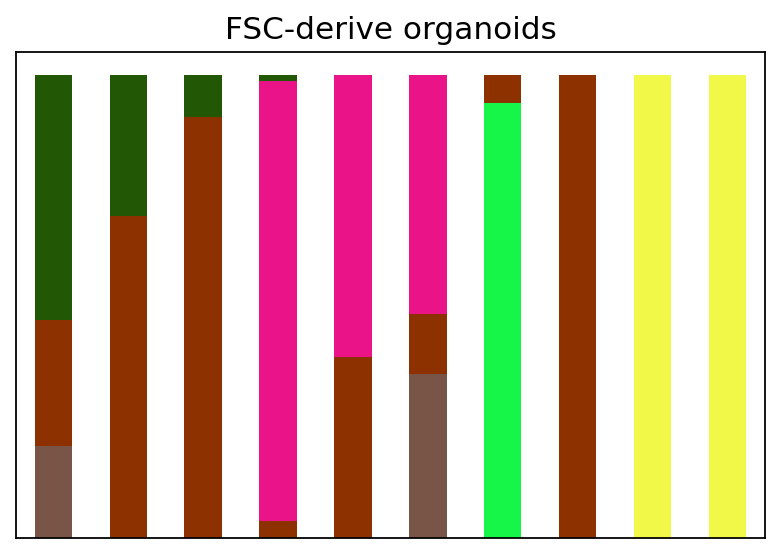

In [117]:
# order=['COPD bronchial (query)', 'COPD nasopharyngeal (query)',]
df_r = df.loc['FSC',:]
fig = df_r.sort_values("stem cells", ascending=False).plot.bar(stacked=True, 
                               xticks = [], yticks=[],
                               title = 'FSC-derive organoids',  
                               legend = False,
                  
                                  grid=False, 
                                  color=col_map,
                                  xlabel='',
                                 
                                 figsize=(6, 4)).get_figure()





fig.savefig('figures/barplot_ct_composition_integrated_lung_epithelial_FSC_200723.png', bbox_inches='tight')


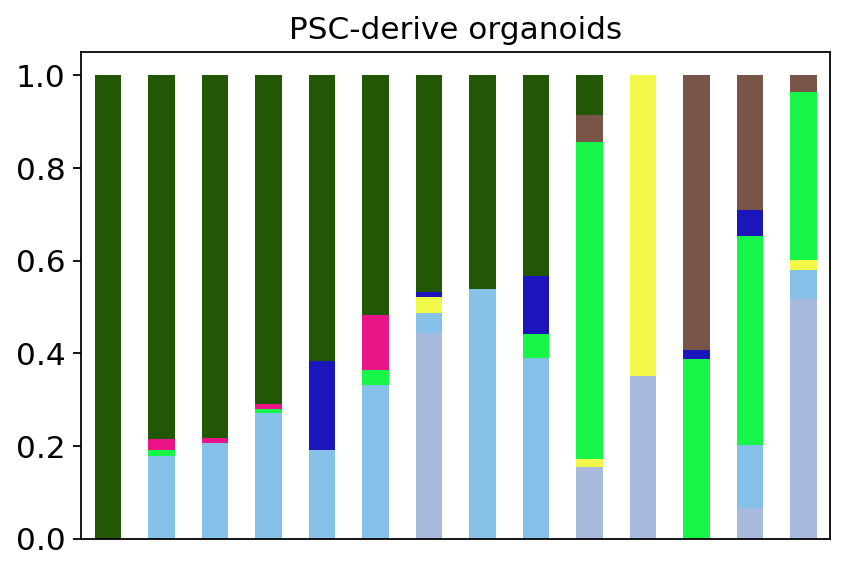

In [118]:
df_r = df.loc['IPS',:]
fig = df_r.sort_values("stem cells",ascending=False).plot.bar(stacked=True, 
                               xticks = [],  legend = False,
                                title = 'PSC-derive organoids',       
                  
                                  grid=False, 
                                  color=col_map,
                                  xlabel='',
                                 
                                 figsize=(6, 4)).get_figure()


fig.savefig('figures/barplot_ct_composition_integrated_lung_epithelial_PSC_200723.png', bbox_inches='tight')


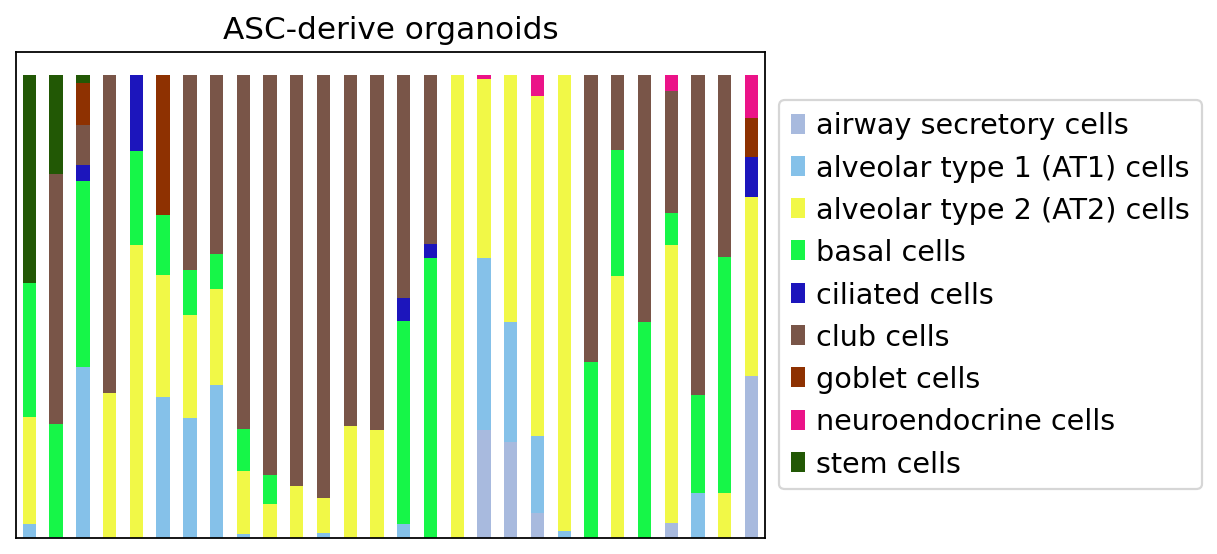

In [119]:
df_r = df.loc['ASC',:]
fig = df_r.sort_values("stem cells", ascending=False).plot.bar(stacked=True, 
                               xticks = [], yticks = [], title = 'ASC-derive organoids',       
                  
                                  grid=False, 
                                  color=col_map,
                                  xlabel='',
                                 
                                 figsize=(6, 4)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5)).get_figure()



fig.savefig('figures/barplot_ct_composition_integrated_lung_epithelial_ASC_200723.png', bbox_inches='tight')

In [120]:
# re-do colors for the fetal reference

tissue_adata = sc.read('../../fetal_lung/lung_integrated_reference.h5ad')

In [121]:
tissue_adata.obs

level_1           level_2  sample_id  \
ACACCCTAGGTAAACT-5891STDY8062349  epithelial          Ciliated  HDBR14808   
ACAGCTAAGGGTTTCT-5891STDY8062349  epithelial          Late tip  HDBR14808   
ACCCACTGTATGAAAC-5891STDY8062349  epithelial              Club  HDBR14808   
ACGAGGAGTACCGCTG-5891STDY8062349  epithelial   MUC16+ ciliated  HDBR14808   
ACGAGGAGTCCTGCTT-5891STDY8062349  epithelial          Ciliated  HDBR14808   
...                                      ...               ...        ...   
TTTCCTCGTCAGTGGA-1-34             epithelial        Suprabasal         34   
TTTGGTTCAGTCGATT-1-34             epithelial     Basal resting         34   
TTTGGTTCATTTCAGG-1-34             epithelial        Suprabasal         34   
TTTGTCAAGTTCCACA-1-34             epithelial  Club (non-nasal)         34   
TTTGTCATCTACTCAT-1-34             epithelial        Suprabasal         34   

                                 maturity  derive conditions_combined  
ACACCCTAGGTAAACT-5891STDY8062349    fetal     NaN   H_D_B_R_1_4_8_0_8  
ACAGCTAAGGGTTTCT-5891STDY8062349    fetal     NaN   H_D_B_R_1_4_8_0_8  
ACCCACTGTATGAAAC-5891STDY8062349    fetal     NaN   H_D_B_R_1_4_8_0_8  
ACGAGGAGTACCGCTG-5891STDY8062349    fetal     NaN   H_D_B_R_1_4_8_0_8  
ACGAGGAGTCCTGCTT-5891STDY8062349    fetal     NaN   H_D_B_R_1_4_8_0_8  
...                                   ...     ...                 ...  
TTTCCTCGTCAGTGGA-1-34              mature     NaN                 3_4  
TTTGGTTCAGTCGATT-1-34              mature     NaN                 3_4  
TTTGGTTCATTTCAGG-1-34              mature     NaN                 3_4  
TTTGTCAAGTTCCACA-1-34              mature     NaN                 3_4  
TTTGTCATCTACTCAT-1-34              mature     NaN                 3_4  

[86830 rows x 6 columns]

In [130]:
col_map['mature'] = col_map['Enterocyte_precursor'] #['M cell','Enterocyte']